**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

*All the text in italics is instructions for filling the template - remove when writing the project report!*

# *Song Genre Classification using multiclassification Logistic Regression* 

*Title should be concise and informative, describes the approach to solve the problem. Some good titles from previous years:*

*- Comparing extreme learning machines and naive bayes’ classifier in spam detection*

*- Using linear discriminant analysis in spam detection*

*Some not-so-good titles:*

*- Bayesian spam filtering with extras*

*- Two-component classifier for spam detection*

*- CS-E3210 Term Project, final report*




## Abstract

*Precise summary of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*



## 1. Introduction

*Background, problem statement, motivation, many references, description of
contents. Introduces the reader to the topic and the broad context within which your
research/project fits*

*- What do you hope to learn from the project?*
*- What question is being addressed?*
*- Why is this task important? (motivation)*

*Keep it short (half to 1 page).*



## 2. Data analysis

*Briefly describe data (class distribution, dimensionality) and how will it affect
classification. Visualize the data. Don’t focus too much on the meaning of the features,
unless you want to.*

*- Include histograms showing class distribution.*



In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier # ovr
from sklearn.metrics import log_loss
#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#...


In [7]:
# Kimi random stuffendaalen
#X, y = make_classification(n_samples=1000, n_features=4,
 #                           n_informative=2, n_redundant=0,
  #                          random_state=0, shuffle=False)
#print(X)

In [8]:
#Variables
output_file = "./output/normal_accuracy.csv"
output_file_logloss = "./output/normal_logloss.csv"
np.set_printoptions(precision=4)




In [9]:
def generate_train_labels():
    rhythm = ["rhythm%d" % i for i in range(0, 168)]
    chroma = ["chroma%d" % i for i in range(168, 216)]
    mfcc = ["mfcc%d" % i for i in range(216,264)]
    return rhythm + chroma + mfcc

/home/zaguero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zaguero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/zaguero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zaguero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zaguero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/home/zaguero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


,rhythm0,rhythm1,rhythm2,rhythm3,rhythm4,rhythm5,rhythm6,rhythm7,rhythm8,rhythm9,rhythm10,rhythm11,rhythm12,rhythm13,rhythm14,rhythm15,rhythm16,rhythm17,rhythm18,rhythm19,rhythm20,rhythm21,rhythm22,rhythm23,rhythm24,rhythm25,rhythm26,rhythm27,rhythm28,rhythm29,rhythm30,rhythm31,rhythm32,rhythm33,rhythm34,rhythm35,rhythm36,rhythm37,rhythm38,rhythm39,rhythm40,rhythm41,rhythm42,rhythm43,rhythm44,rhythm45,rhythm46,rhythm47,rhythm48,rhythm49,rhythm50,rhythm51,rhythm52,rhythm53,rhythm54,rhythm55,rhythm56,rhythm57,rhythm58,rhythm59,rhythm60,rhythm61,rhythm62,rhythm63,rhythm64,rhythm65,rhythm66,rhythm67,rhythm68,rhythm69,rhythm70,rhythm71,rhythm72,rhythm73,rhythm74,rhythm75,rhythm76,rhythm77,rhythm78,rhythm79,rhythm80,rhythm81,rhythm82,rhythm83,rhythm84,rhythm85,rhythm86,rhythm87,rhythm88,rhythm89,rhythm90,rhythm91,rhythm92,rhythm93,rhythm94,rhythm95,rhythm96,rhythm97,rhythm98,rhythm99,rhythm100,rhythm101,rhythm102,rhythm103,rhythm104,rhythm105,rhythm106,rhythm107,rhythm108,rhythm109,rhythm110,rhythm111,rhythm112,rhythm113,rhythm114,rhythm115,rhythm116,rhythm117,rhythm118,rhythm119,rhythm120,rhythm121,rhythm122,rhythm123,rhythm124,rhythm125,rhythm126,rhythm127,rhythm128,rhythm129,rhythm130,rhythm131,rhythm132,rhythm133,rhythm134,rhythm135,rhythm136,rhythm137,rhythm138,rhythm139,rhythm140,rhythm141,rhythm142,rhythm143,rhythm144,rhythm145,rhythm146,rhythm147,rhythm148,rhythm149,rhythm150,rhythm151,rhythm152,rhythm153,rhythm154,rhythm155,rhythm156,rhythm157,rhythm158,rhythm159,rhythm160,rhythm161,rhythm162,rhythm163,rhythm164,rhythm165,rhythm166,rhythm167,chroma168,chroma169,chroma170,chroma171,chroma172,chroma173,chroma174,chroma175,chroma176,chroma177,chroma178,chroma179,chroma180,chroma181,chroma182,chroma183,chroma184,chroma185,chroma186,chroma187,chroma188,chroma189,chroma190,chroma191,chroma192,chroma193,chroma194,chroma195,chroma196,chroma197,chroma198,chroma199,chroma200,chroma201,chroma202,chroma203,chroma204,chroma205,chroma206,chroma207,chroma208,chroma209,chroma210,chroma211,chroma212,chroma213,chroma214,chroma215,mfcc216,mfcc217,mfcc218,mfcc219,mfcc220,mfcc221,mfcc222,mfcc223,mfcc224,mfcc225,mfcc226,mfcc227,mfcc228,mfcc229,mfcc230,mfcc231,mfcc232,mfcc233,mfcc234,mfcc235,mfcc236,mfcc237,mfcc238,mfcc239,mfcc240,mfcc241,mfcc242,mfcc243,mfcc244,mfcc245,mfcc246,mfcc247,mfcc248,mfcc249,mfcc250,mfcc251,mfcc252,mfcc253,mfcc254,mfcc255,mfcc256,mfcc257,mfcc258,mfcc259,mfcc260,mfcc261,mfcc262,mfcc263
0,1040.7,2315.6,2839.1,2552.2,2290.4,1913.8,2152.6,1930.3,2079.3,1706.7,1953.4,1513.5,1882.6,1802.7,2050.5,1891.1,1614.4,950.52,787.93,697.59,477.02,301.42,122.39,1.499,580.90,2149.8,1543.60,1046.4,1588.90,1388.5,1527.40,1135.00,1244.20,1088.60,1636.40,1044.80,1763.0,1476.80,1979.7,1503.2,1168.3,286.36,203.43,192.00,106.19,76.905,26.470,0.016,989.470,1484.400,744.62,367.04,961.96,1378.60,963.90,1206.20,926.070,1363.70,1262.30,1185.70,1566.60,1073.40,1383.60,1270.50,1197.40,857.27,1121.20,1373.70,1359.90,2052.60,2598.00,11504.0,3987.6,5632.8,3509.8,2556.8,4313.3,5500.1,3890.4,5192.5,3813.0,5921.8,4324.7,4601.6,7033.8,3856.0,5336.3,4940.8,4560.1,4190.1,5504.3,6080.7,5272.6,9246.9,12185.0,150390.0,831.58,1914.5,2639.0,2439.4,2064.3,1673.4,1931.5,1748.0,1846.5,1492.1,1566.5,1291.5,1552.6,1464.3,1697.6,1575.8,1344.2,863.88,726.28,590.76,393.19,217.53,66.000,1.066,6.04,203.38,430.02,500.56,217.93,303.61,209.62,214.75,291.37,198.77,202.13,169.68,210.85,165.78,231.08,258.48,176.54,21.119,73.797,80.082,37.997,24.555,1.593,1.066,4097.7,8669.9,7205.8,5314.4,7448.6,6748.8,6298.5,6559.9,6393.4,6705.8,6701.1,5542.9,8142.4,6256.2,7571.7,6894.4,5794.4,3102.8,2811.0,2781.5,1743.1,1705.5,1037.8,49.366,0.53113,0.27914,0.29100,0.18867,0.27142,0.43106,0.23045,0.30437,0.19682,0.36930,0.35071,0.22654,0.131870,0.054957,0.084974,0.037669,0.066023,0.125500,0.047220,0.094917,0.040921,0.110060,0.099065,0.045715,0.010,0.009,0.007,0.003,0.002,0.007,0.006,0.006,0.003,0.004,0.003,0.003,1.0,1.0,1.000,1.0,1.0,1.000,1.000,1.0,1.0,1.0,1.0,1.0,1000000.0,1000000.0,1000000.0,10

,Sample_label
0,1
1,1
2,1
3,1
4,1


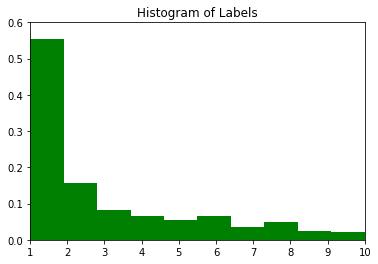

In [11]:
# Load the data and cleanup
train_data_df = pd.read_csv("train_data.csv", header=None, names=generate_train_labels())
train_data_labels_df = pd.read_csv("train_labels.csv", header = None, names = ["Sample_label"])
test_data_df = pd.read_csv("test_data.csv", header = None)

all_labels = train_data_labels_df.as_matrix()

all_train_features = train_data_df.as_matrix()
#features = preprocessing.normalize(features, 'l1')
# Not normalized because https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression

x_train, x_test, y_train, y_test = train_test_split(train_data_df, train_data_labels_df, test_size = 0.3, random_state=0)



# Changing csv format to numpy array format
labels_train = y_train.as_matrix()
#labels = labels[0].ravel()
features_train = x_train.as_matrix()

labels_test = y_test.as_matrix()
#labels = labels[0].ravel()
features_test = x_test.as_matrix()

# Display first 5 song feautures
display(HTML(train_data_df.head(5).to_html(max_rows=5)))
# Display first 5 song labels 
display(HTML(train_data_labels_df.head(5).to_html(max_rows=5)))
# Scatter plots of the features

# rhythm, chroma and mfcc features scatter plot

# The dimensionality of the data is high as there are 264 features. Analysing the data visually is very hard when the dimensionality increases over 6. There are multiple ways for reducing the dimensions of dataset, so it can be further analyzed. WE have used PCA to reduce the number of features.
# The features are divided in three categories: 1) Timbre; 2) Rhytm and 3) Pitch. In theory the data could be reduced to these three components, but if the features are reduced under, see below.
# We noticed by trial and error that with six principle six Principle Components it ispossible to maintain accuracy of the data and 99% of the variance of the data.
# Scatter plot of reduced data set (6 features)



pca = PCA(n_components = 3, svd_solver = "full")
features_for_scatter = pca.fit_transform(train_data_df)


"""
rhytm_fe = features[:,0:168]
chroma_fe = features[:,168:216]
mfcc_fe = features[:,216:264]
y1 = labels[0:168]
y1 = labels[168:216]
y1 = labels[216:264]

plt.figure(1)
plt.scatter(rhytm_fe, y1, color="k")

plt.scatter(chroma_fe, y2, color="b")

plt.scatter(mfcc_fe, y3, color="y")
plt.show()
"""

# Display histogram data of labels (different kind of songs)

n, bins, patches = plt.hist(all_labels, 10, density=1, facecolor='g')
plt.title('Histogram of Labels')

plt.axis([1, 10, 0, 0.6])
plt.show()







In [6]:
#Analysis of the input data
# ...

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



PCA

The high number of features lead us to try Principal Component Analysis (PCA) for reducing the number of features. However, with PCA our results worsened significantly, and hence we did not use it. The results from logloss was around 0.36 and accuracy 0.36 Below you can see the code we used for PCA. 

In [12]:
# Writing logloss format
def write_output_logloss(model_prediction, output_file):
    with open(output_file, "w") as output:
        output.write("Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10\n")
        for idx, pred in enumerate(model_prediction):
            s= ""
            for val in pred:
                s += ", " + str(val)
            output.write(str(idx + 1) + s + "\n")
            

# Writing accuracy format
def write_output(model_prediction, output_file):
    with open(output_file, "w") as output:
        output.write("Sample_id,Sample_label\n")
        for idx, pred in enumerate(model_prediction):
            output.write(str(idx + 1) + "," + str(int(pred)) + "\n")




In [10]:
# Trials with ML algorithms
pca = PCA(n_components = 100, svd_solver = "full")
features_train = pca.fit_transform(train_data_df)
test_data_df_pca = pca.fit_transform(test_data_df)
#features = pca.transform(features)

clf = LogisticRegression(random_state=23, solver='lbfgs', multi_class="ovr", max_iter = 1000)
ovr = OneVsRestClassifier(clf)
ovr.fit(features_train,labels_train)


score_train = ovr.score(features_train, labels_train)
#score_test = ovr.score(features_test, labels_test)
print("Score from training data is {:.4f} and from test data {:.4f}. The difference is {:.4f}".format(float(score_train), float(score_test), float(score_train-score_test)))


predictData = ovr.predict(test_data_df_pca)
predictProbData = ovr.predict_proba(test_data_df_pca)

#y_pred = clf.predict(X_test)
#accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

ValueError: Found input variables with inconsistent numbers of samples: [4363, 3054]

RandoMForest
We tried classifier called RandomForestClassifier as it is "The state-of-art" classifier at time being. Unofortunately, we did not acquire results we were hoping for. Overfitting with RFC was fairly low as the difference was only 0.0073, but the overall results were quite much lower compared to LogisticRegression which scored around 7% higher.

0.21 logloss
0.53 accuracy


In [13]:

clf = RandomForestClassifier(random_state=23, n_estimators=100, max_depth=30)
ovr = OneVsRestClassifier(clf)
ovr.fit(features_train,labels_train)


score_train = ovr.score(features_train, labels_train)
score_test = ovr.score(features_test, labels_test)
print("Score from training data is {:.4f} and from test data {:.4f}. The difference is {:.4f}".format(float(score_train), float(score_test), float(score_train-score_test)))


predictData = ovr.predict(test_data_df)
predictProbData = ovr.predict_proba(test_data_df)

#y_pred = clf.predict(X_test)
#accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

Score from training data is 1.0000 and from test data 0.6264. The difference is 0.3736


In [ ]:
#LogisticRegression



In [53]:

clf = LogisticRegression(random_state=42, solver='lbfgs', multi_class="ovr", max_iter = 1000)
ovr = OneVsRestClassifier(clf)
ovr.fit(features_train,labels_train)


score_train = ovr.score(features_train, labels_train)
score_test = ovr.score(features_test, labels_test)
print("Score from training data is {:.4f} and from test data {:.4f}. The difference is {:.4f}".format(float(score_train), float(score_test), float(score_train-score_test)))


predictData = ovr.predict(test_data_df)
predictProbData = ovr.predict_proba(test_data_df)

#y_pred = clf.predict(X_test)
#accuracy = np.sum(y_pred == y_test) / y_test.shape[0]

/home/zaguero/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/zaguero/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/zaguero/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/zaguero/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/zaguero/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.


Score from training data is 0.6555 and from test data 0.5882. The difference is 0.0673


In [51]:
# Outpt the above regression
write_output(predictData, output_file)
write_output_logloss(predictProbData, output_file_logloss)

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*



In [58]:
# Performance measure : Accuracy


y_pred =ovr.predict(features_train)

accuracy_overfit = (np.sum(labels_train[:,0] == y_pred)/labels_train.shape[0])*100
y_pred_test = ovr.predict(features_test)
accu_test  = (np.sum(labels_test[:,0] == y_pred_test)/labels_test.shape[0])*100
print("Accuracy for the training data (overfitting): %.4f" % accuracy_overfit, "%" )

print("Accuracy for the predicted test data: %.4f" % accu_test, "%" )

Accuracy for the training data (overfitting): 65.5534 %
Accuracy for the predicted test data: 58.8235 %


In [89]:
# Performance measure : LogLoss

predictProb_test = ovr.predict_proba(features_test)
logilossi = log_loss(labels_test[:,0], predictProb_test, 1e-15)
logilossi = logilossi / 10 # 10 different classes, thus
print("Multiclass logarithmic loss for predicted test data: %.2f" % logilossi)



#https://www.kaggle.com/c/predict-closed-questions-on-stack-overflow/discussion/2644

# Multiclass implemented by myself

y_pred =predictProb_test
y_true = labels_test
"""
print(y_true.shape)
print(y_pred.shape)
eps = 1e-15
predictions = np.clip(y_pred, eps, 1 - eps)

# normalize row sums to 1
predictions /= predictions.sum(axis=1)[:, np.newaxis]

actual = np.zeros(y_pred.shape)
rows = actual.shape[0]
actual[np.arange(rows), y_true.astype(int)] = 1
vsota = np.sum(actual * np.log(predictions))
loglossu = -1/rows*vsota

print(loglossu)
"""

Multiclass logarithmic loss for predicted test data: 0.14


'\nprint(y_true.shape)\nprint(y_pred.shape)\neps = 1e-15\npredictions = np.clip(y_pred, eps, 1 - eps)\n\n# normalize row sums to 1\npredictions /= predictions.sum(axis=1)[:, np.newaxis]\n\nactual = np.zeros(y_pred.shape)\nrows = actual.shape[0]\nactual[np.arange(rows), y_true.astype(int)] = 1\nvsota = np.sum(actual * np.log(predictions))\nloglossu = -1/rows*vsota\n\nprint(loglossu)\n'

Confusion matrix, without normalization
[[585  45   9   8   5   7   0   6   1   0]
 [ 56  80   9   5   1   2   4   2   2   1]
 [ 21  14  48   1   3   7   0   0   6   1]
 [ 24   7   4  17   2   5   3   1   0   5]
 [ 46   6   4   3   6   3   1   0   2   2]
 [ 31  11   9   4   3  18   0   2   5   0]
 [ 25   2   3   2   3   0   0   0   3   0]
 [ 42   3   1   3   4   0   0  10   0   0]
 [  3   3   7   2   1   2   0   0   6   0]
 [ 22   2   1   4   1   0   0   0   1   0]]
Normalized confusion matrix
[[0.88 0.07 0.01 0.01 0.01 0.01 0.   0.01 0.   0.  ]
 [0.35 0.49 0.06 0.03 0.01 0.01 0.02 0.01 0.01 0.01]
 [0.21 0.14 0.48 0.01 0.03 0.07 0.   0.   0.06 0.01]
 [0.35 0.1  0.06 0.25 0.03 0.07 0.04 0.01 0.   0.07]
 [0.63 0.08 0.05 0.04 0.08 0.04 0.01 0.   0.03 0.03]
 [0.37 0.13 0.11 0.05 0.04 0.22 0.   0.02 0.06 0.  ]
 [0.66 0.05 0.08 0.05 0.08 0.   0.   0.   0.08 0.  ]
 [0.67 0.05 0.02 0.05 0.06 0.   0.   0.16 0.   0.  ]
 [0.12 0.12 0.29 0.08 0.04 0.08 0.   0.   0.25 0.  ]
 [0.71 0.06 0.03 0.13 0.

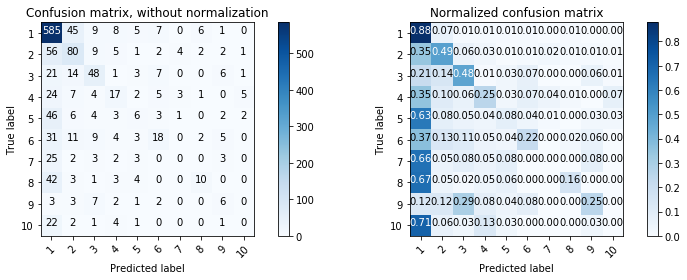

In [91]:
#Confusion matrix ...
import itertools

import numpy as np

import matplotlib.pyplot as plt



from sklearn import svm, datasets




def plot_confusion_matrix(cm, classes,

                         normalize=False,

                         title='Confusion matrix',

                         cmap=plt.cm.Blues):

   """

   This function prints and plots the confusion matrix.

   Normalization can be applied by setting normalize=True.

   """

   if normalize:

       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

       print("Normalized confusion matrix")

   else:

       print('Confusion matrix, without normalization')



   print(cm)



   plt.imshow(cm, interpolation='nearest', cmap=cmap)

   plt.title(title)

   plt.colorbar()

   tick_marks = np.arange(len(classes))

   plt.xticks(tick_marks, classes, rotation=45)

   plt.yticks(tick_marks, classes)



   fmt = '.2f' if normalize else 'd'

   thresh = cm.max() / 2.

   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

       plt.text(j, i, format(cm[i, j], fmt),

                horizontalalignment="center",

                color="white" if cm[i, j] > thresh else "black")



   plt.tight_layout()

   plt.ylabel('True label')

   plt.xlabel('Predicted label')



# Compute confusion matrix
y_pred = ovr.predict(features_test)
class_names = ['1', '2','3','4','5','6','7','8','9','10']

cnf_matrix = confusion_matrix(y_true, y_pred)

np.set_printoptions(precision=2)



# Plot non-normalized confusion matrix

plt.figure(figsize=(12, 4))

plt.subplot(121)

plot_confusion_matrix(cnf_matrix, classes=class_names,

                     title='Confusion matrix, without normalization')



# Plot normalized confusion matrix

plt.subplot(122)

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,

                     title='Normalized confusion matrix')


## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *